In [52]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
#Read the Dataset
df = pd.read_csv('Loan_Prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [54]:
#Drop Duplicates
df = df.drop_duplicates(keep='first')

In [55]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [56]:
#Drop Null values(row)
df1 = df.dropna()

In [57]:
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [58]:
#Drop Null values (columns) 
df1 = df.dropna(axis=1)
df1

,Loan_ID,Education,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status
0,LP001002,Graduate,5849,0.0,Urban,Y
1,LP001003,Graduate,4583,1508.0,Rural,N
2,LP001005,Graduate,3000,0.0,Urban,Y
3,LP001006,Not Graduate,2583,2358.0,Urban,Y
4,LP001008,Graduate,6000,0.0,Urban,Y
...,...,...,...,...,...,...
609,LP002978,Graduate,2900,0.0,Rural,Y
610,LP002979,Graduate,4106,0.0,Rural,Y
611,LP002983,Graduate,8072,240.0,Urban,Y
612,LP002984,Graduate,7583,0.0,Urban,Y


In [59]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [60]:
#Replace Null values with 0
df2 = df.fillna(0)
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [61]:
df2.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [62]:
df2 = df.fillna({
    'Gender':'Male',
    'Married':'No',
    'Dependents': 0,
    'Self_Employed':'Yes',
    'LoanAmount': 0,
    'Loan_Amount_Term':0,
    'Property_Area':'Urban'
})

In [63]:
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [64]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [65]:
#Replace Null values with mean
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace = True)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [66]:
#Replace Null values with mean
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace = True)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [67]:
#Replace Null values with median
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace = True)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [68]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace = True)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [69]:
#Replace Null values with mode
df['Gender'].fillna(df['Gender'].mode()[0],inplace = True)

In [70]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [71]:
#Replace Null values with mode
df['Married'].fillna(df['Married'].mode()[0],inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace = True)  
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace = True)

In [72]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

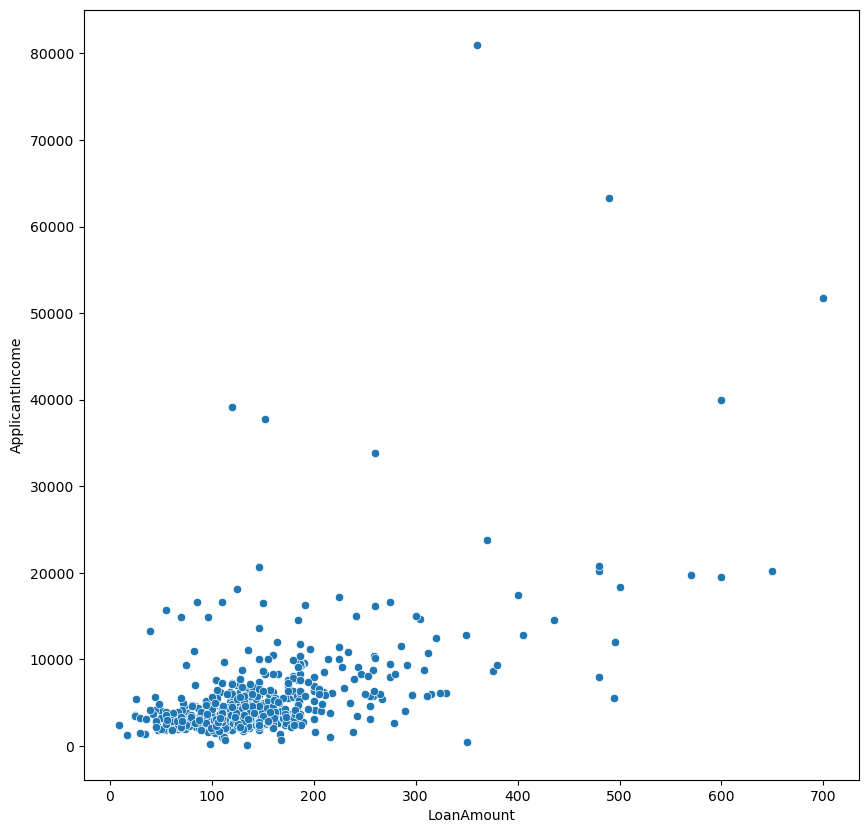

In [73]:
#Scatter plot without hue
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,y='ApplicantIncome',x='LoanAmount')

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='ApplicantIncome'>

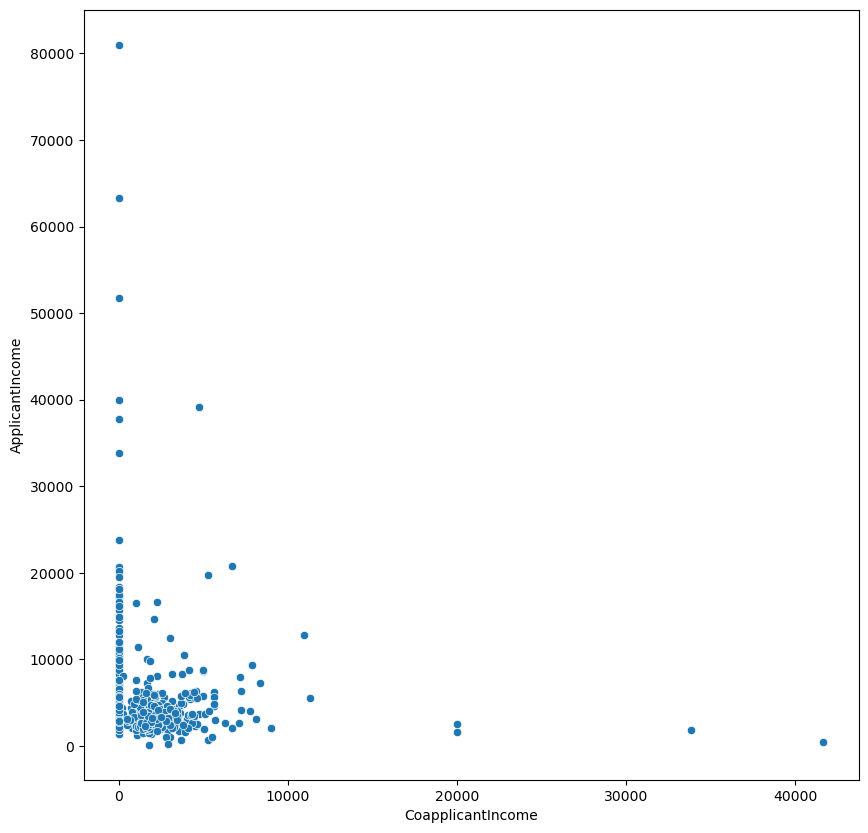

In [74]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,y='ApplicantIncome',x='CoapplicantIncome')

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='ApplicantIncome'>

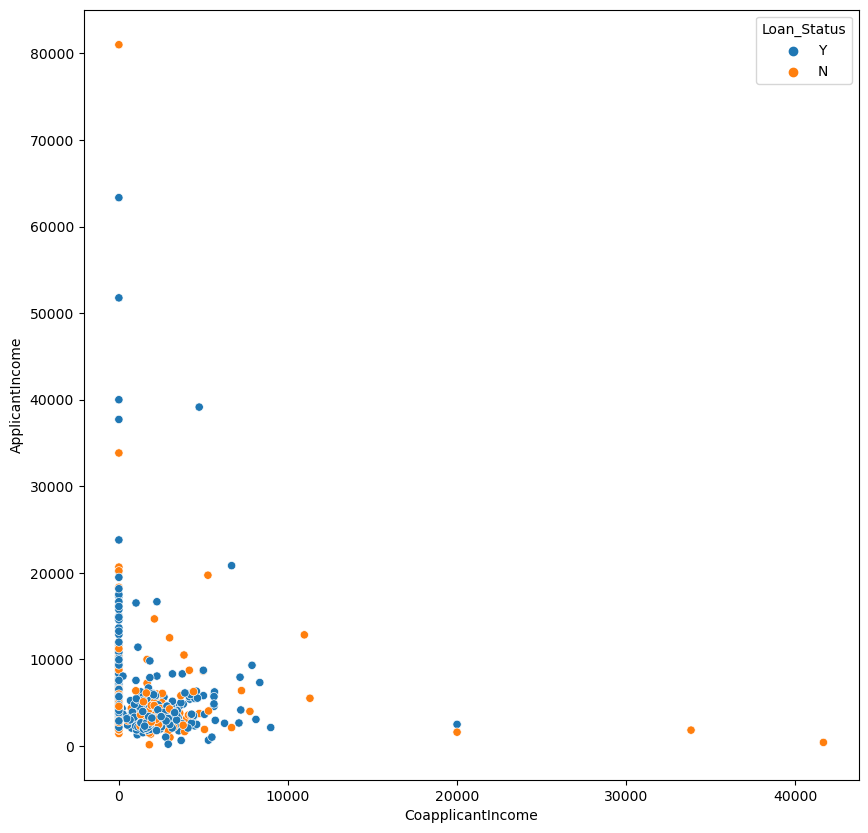

In [75]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,y='ApplicantIncome',x='CoapplicantIncome',hue='Loan_Status')

In [76]:
df3 = df[['ApplicantIncome','Loan_Status']]
df3

,ApplicantIncome,Loan_Status
0,5849,Y
1,4583,N
2,3000,Y
3,2583,Y
4,6000,Y
...,...,...
609,2900,Y
610,4106,Y
611,8072,Y
612,7583,Y


<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

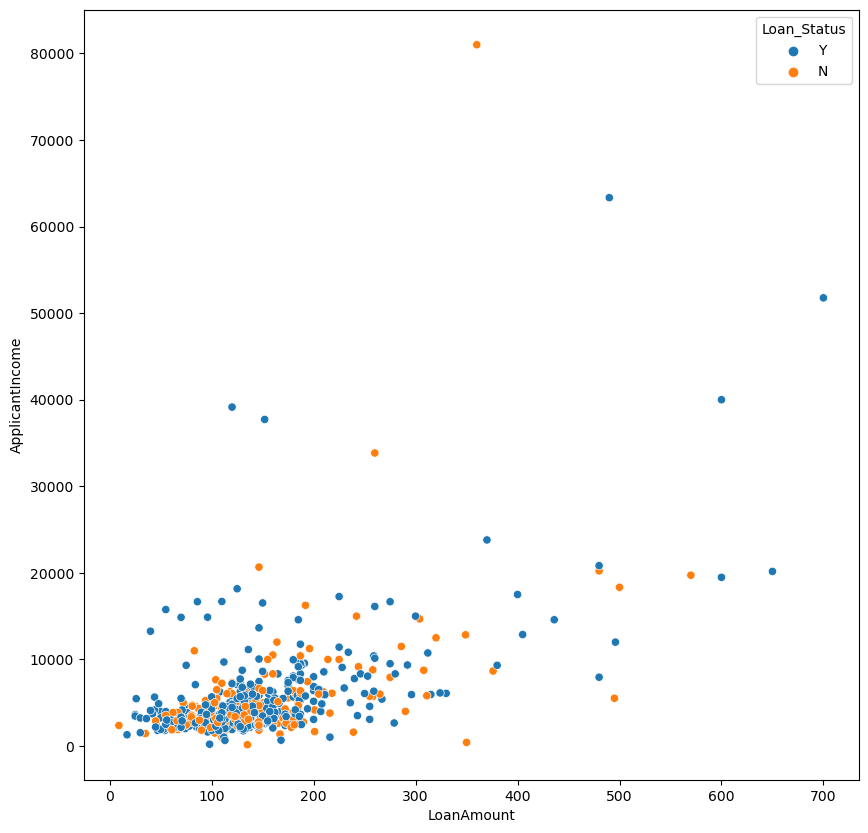

In [77]:
#scatterplot with hue
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,y='ApplicantIncome',x='LoanAmount',hue='Loan_Status')

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

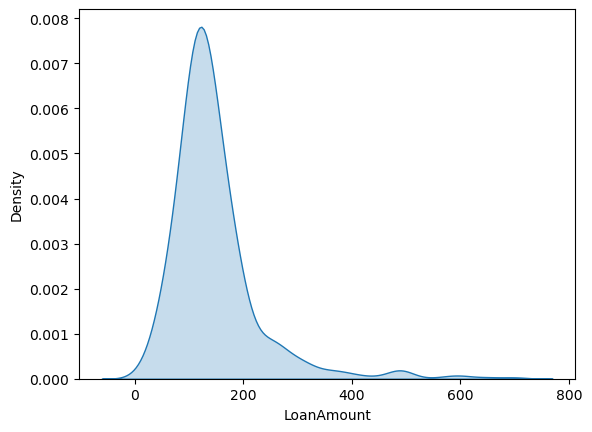

In [78]:
#KDE plotting
sns.kdeplot(x = 'LoanAmount', data = df, shade = True)

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

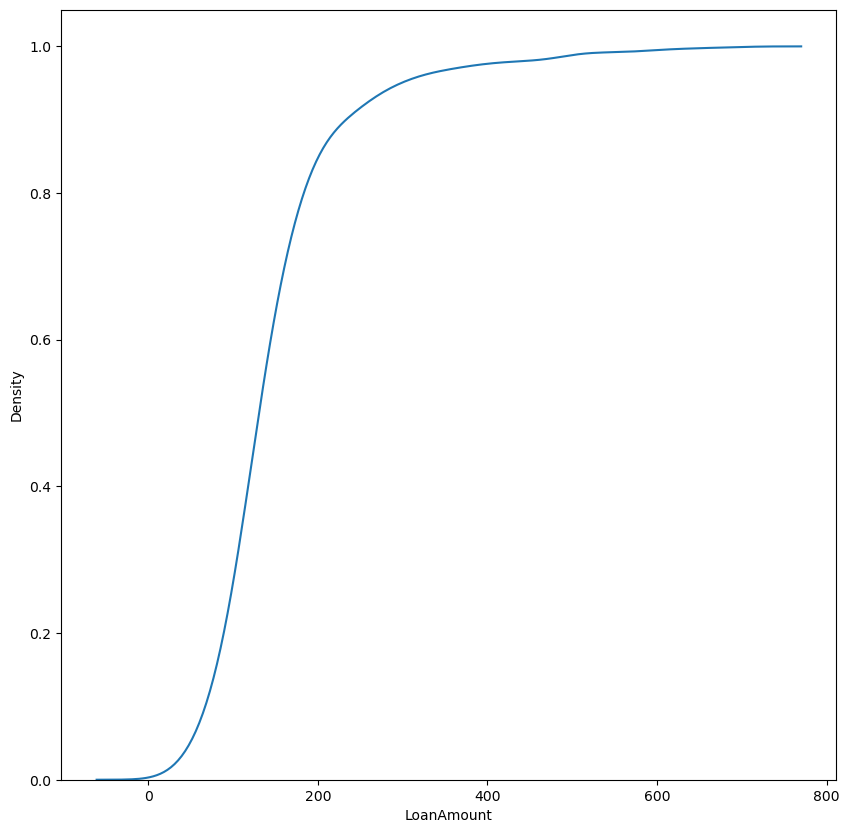

In [79]:
plt.figure(figsize = (10,10)) 
sns.kdeplot(x = 'LoanAmount', data = df, cumulative = True)

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

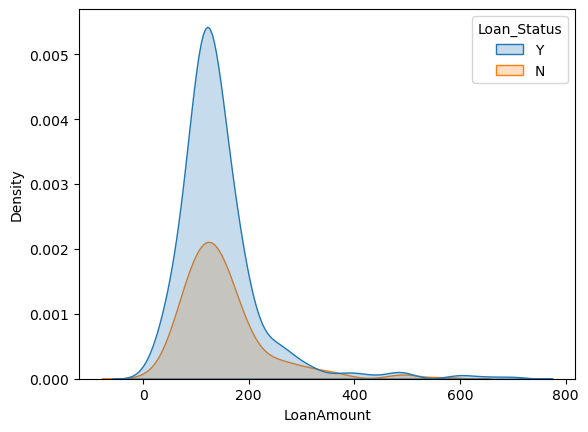

In [80]:
sns.kdeplot(x = 'LoanAmount', data = df, shade = True, hue = 'Loan_Status')

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

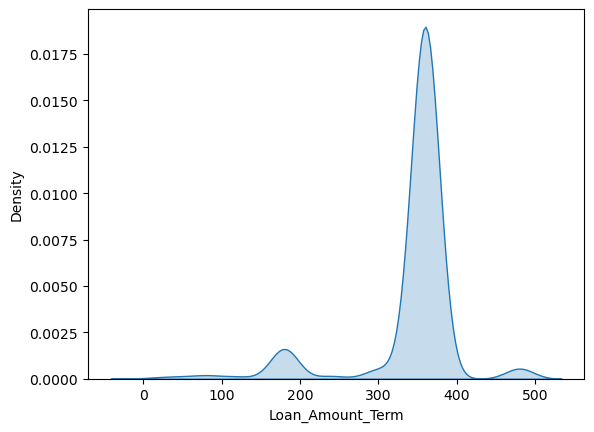

In [81]:
sns.kdeplot(x = 'Loan_Amount_Term', data = df, shade = True)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

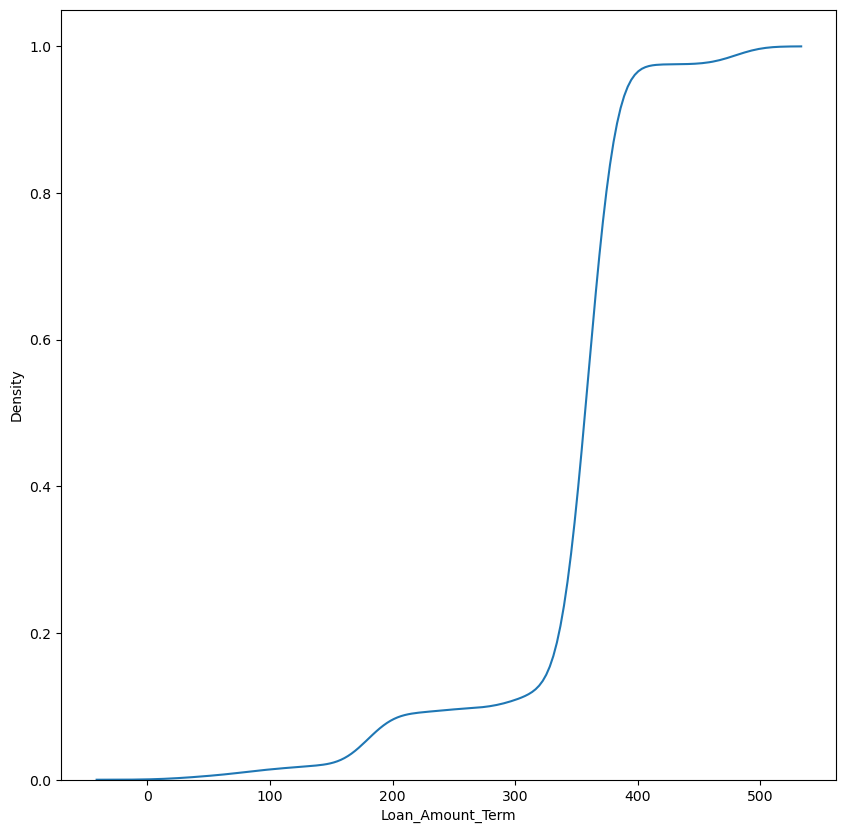

In [82]:
plt.figure(figsize = (10,10)) 
sns.kdeplot(x = 'Loan_Amount_Term', data = df, cumulative = True)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

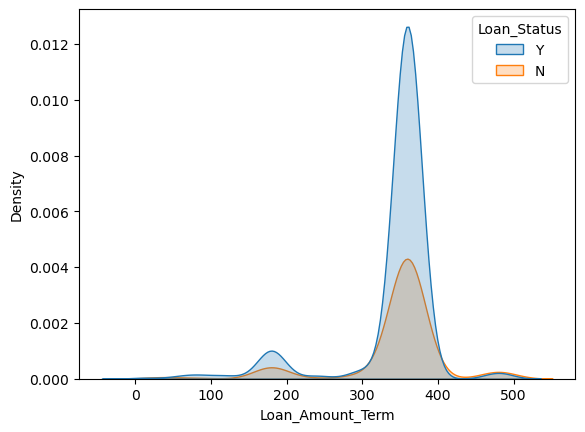

In [83]:
sns.kdeplot(x = 'Loan_Amount_Term', data = df, shade = True, hue = 'Loan_Status')

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

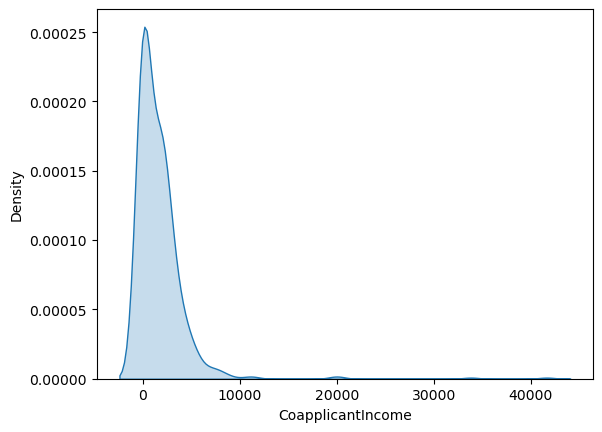

In [84]:
sns.kdeplot(x = 'CoapplicantIncome', data = df, shade = True)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

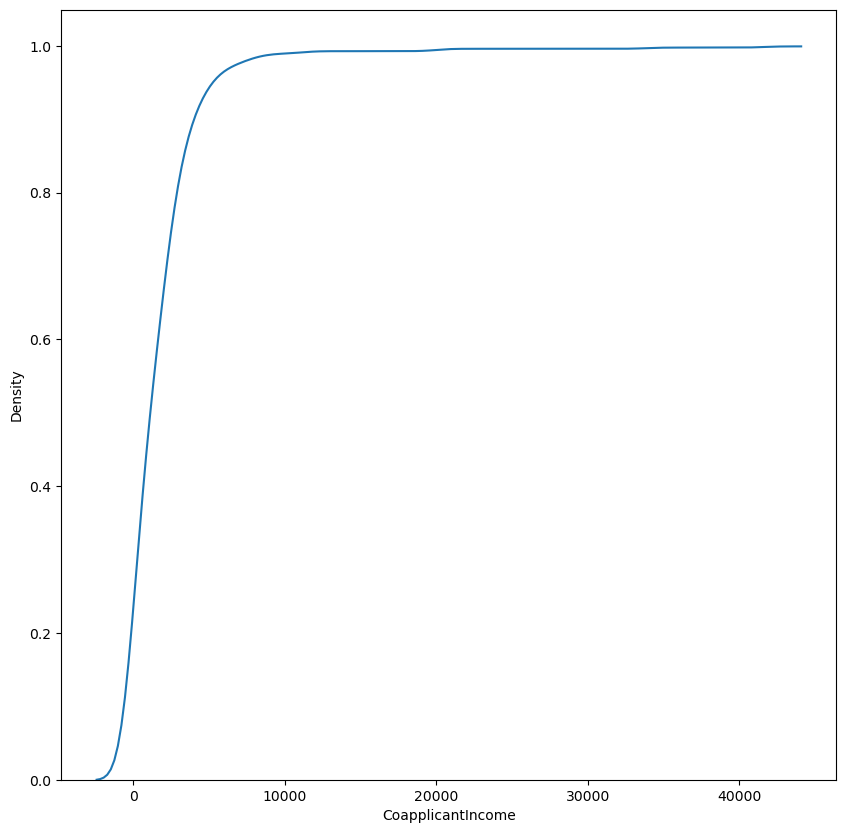

In [85]:
plt.figure(figsize = (10,10)) 
sns.kdeplot(x = 'CoapplicantIncome', data = df, cumulative = True)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

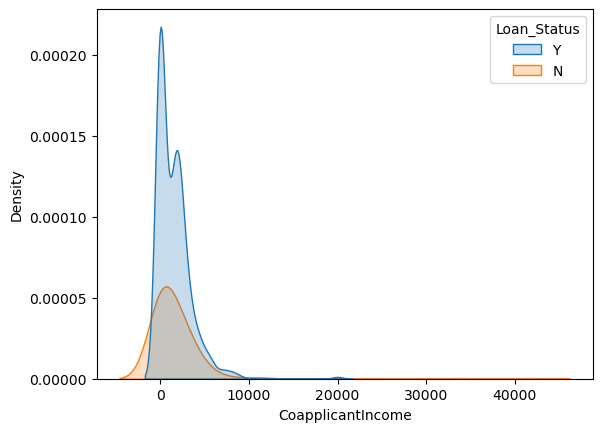

In [86]:
sns.kdeplot(x = 'CoapplicantIncome', data = df, shade = True, hue = 'Loan_Status')

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

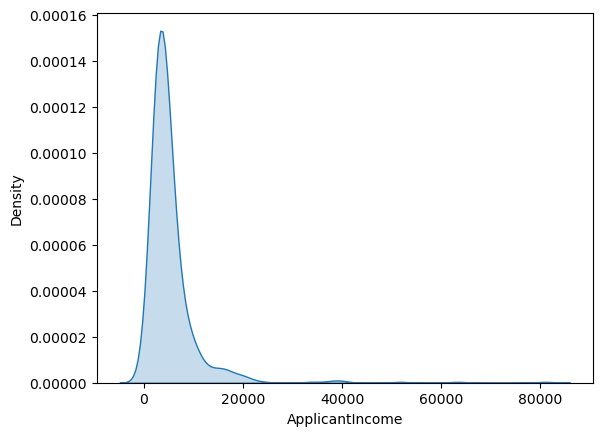

In [87]:
sns.kdeplot(x = 'ApplicantIncome', data = df, shade = True)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

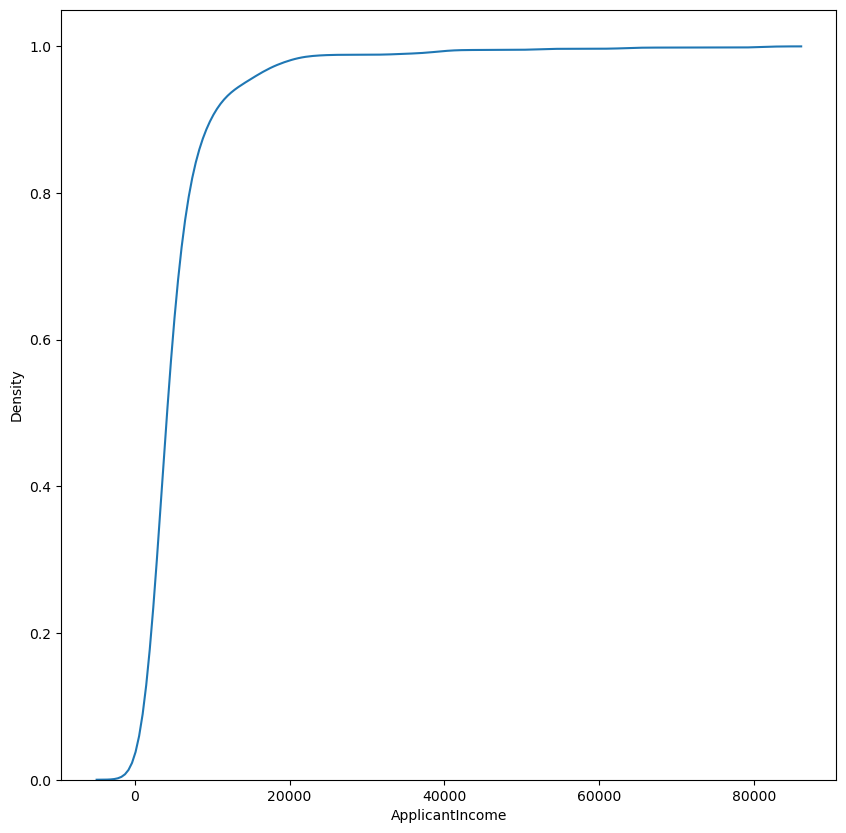

In [88]:
plt.figure(figsize = (10,10)) 
sns.kdeplot(x = 'ApplicantIncome', data = df, cumulative = True)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

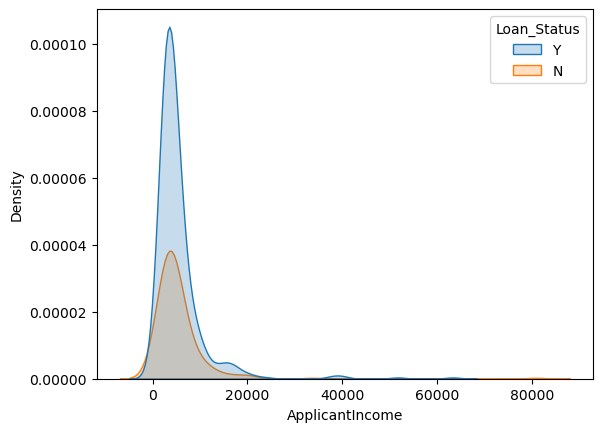

In [89]:
sns.kdeplot(x = 'ApplicantIncome', data = df, shade = True, hue = 'Loan_Status')

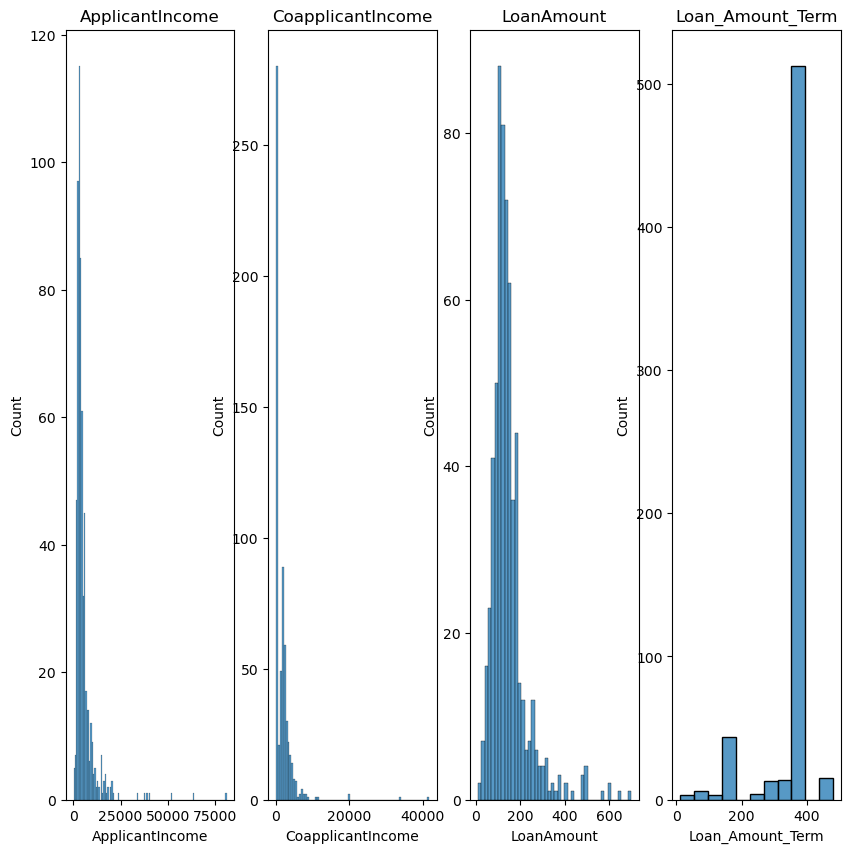

In [90]:
#Histogram without hue
columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
fig=plt.figure(figsize=(10,10))
for i, j in enumerate(columns):
    axis=fig.add_subplot(1,4,i + 1)
    sns.histplot(data=df, x=j, axes=axis)
    axis.set_title(j)
plt.show()

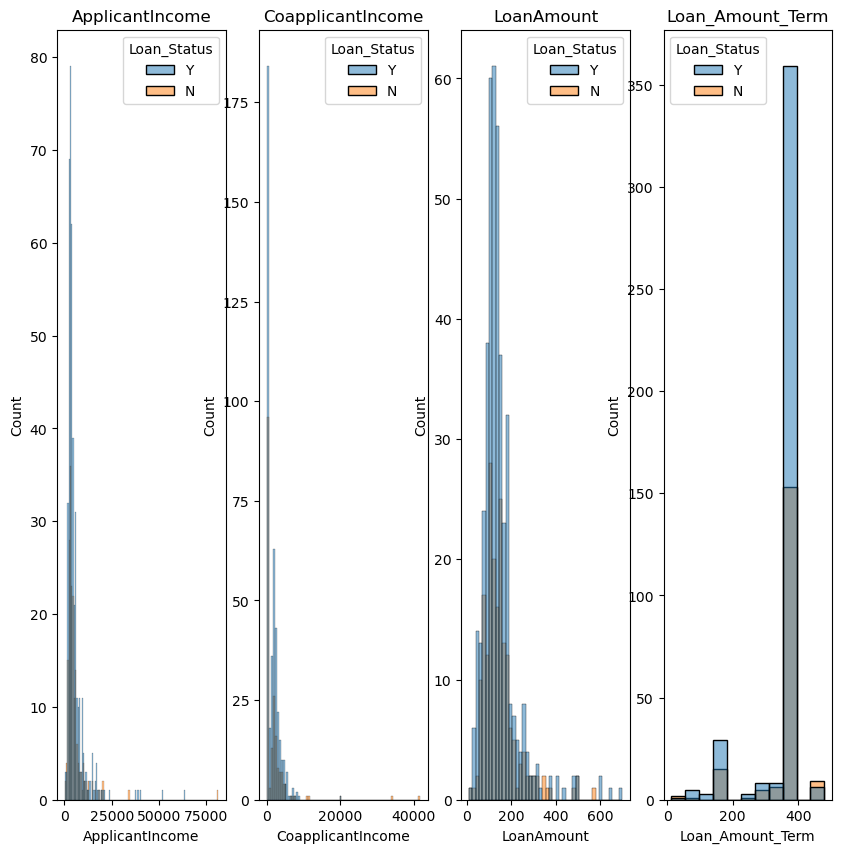

In [91]:
#Histogram with hue
columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
fig=plt.figure(figsize=(10,10))
for i, j in enumerate(columns):
    axis=fig.add_subplot(1,4,i + 1)
    sns.histplot(data=df, x=j, axes=axis,hue = 'Loan_Status')
    axis.set_title(j)
plt.show()

<AxesSubplot:xlabel='Education', ylabel='LoanAmount'>

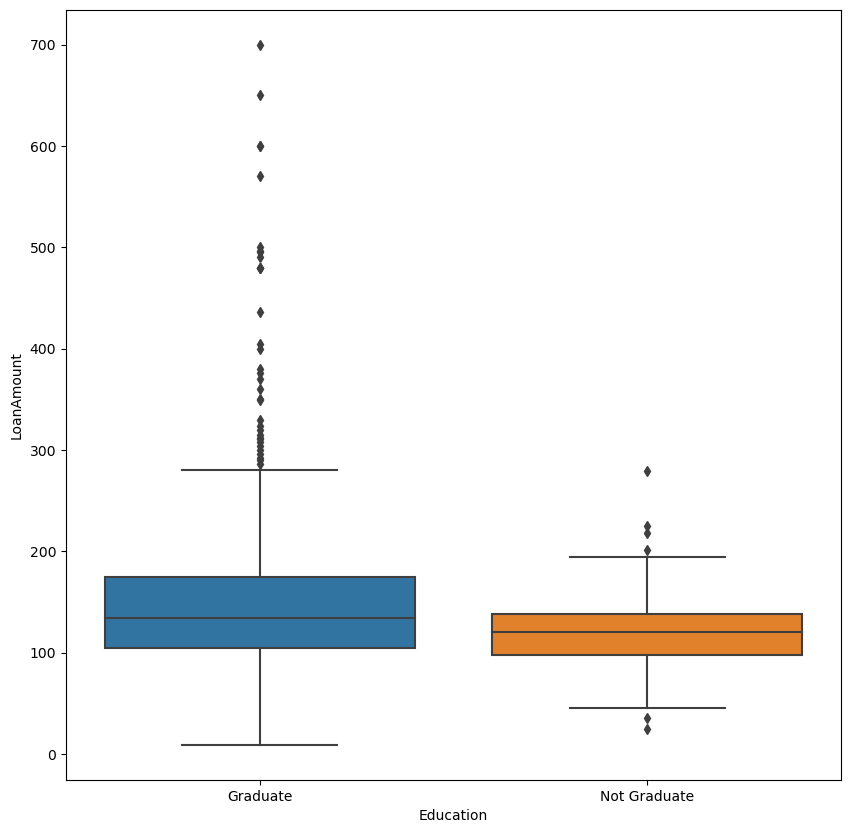

In [92]:
#Boxplot
plt.figure(figsize=(10,10))
sns.boxplot(data=df,x='Education',y='LoanAmount')

<AxesSubplot:xlabel='Education', ylabel='CoapplicantIncome'>

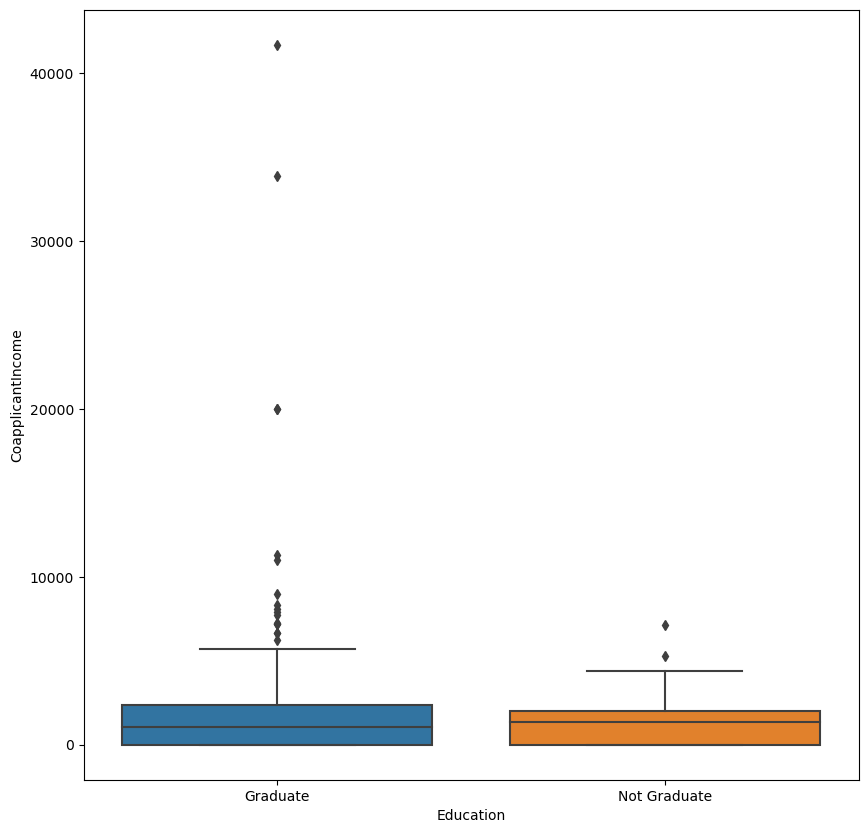

In [93]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,x= 'Education',y='CoapplicantIncome')

<AxesSubplot:xlabel='Education', ylabel='LoanAmount'>

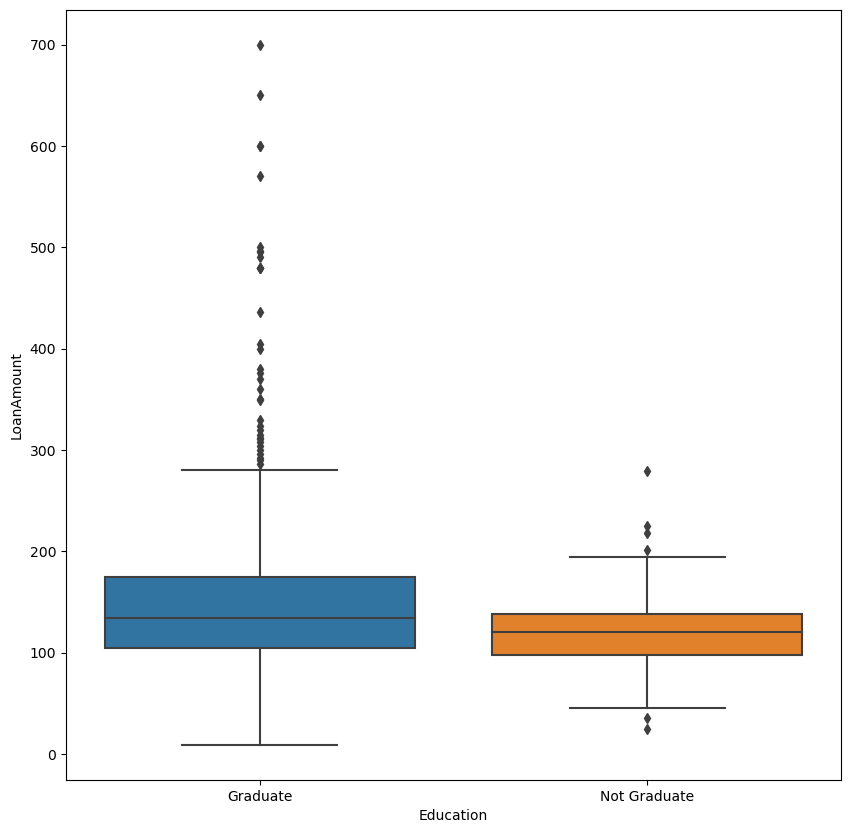

In [94]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,x= 'Education',y='LoanAmount')

<AxesSubplot:xlabel='Married', ylabel='LoanAmount'>

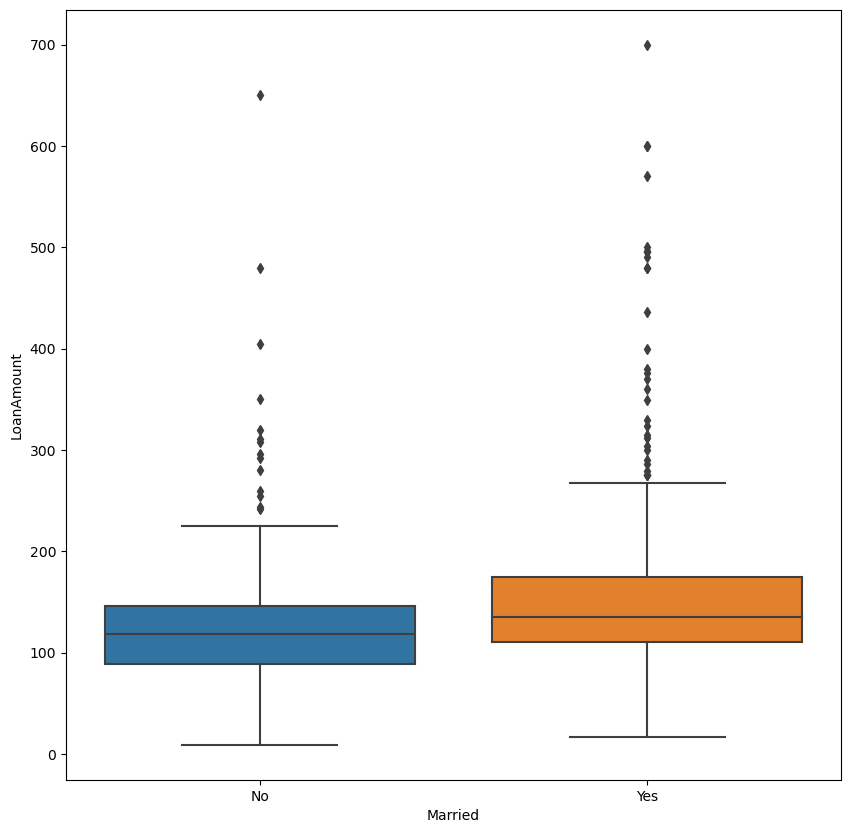

In [95]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,x='Married',y='LoanAmount')

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

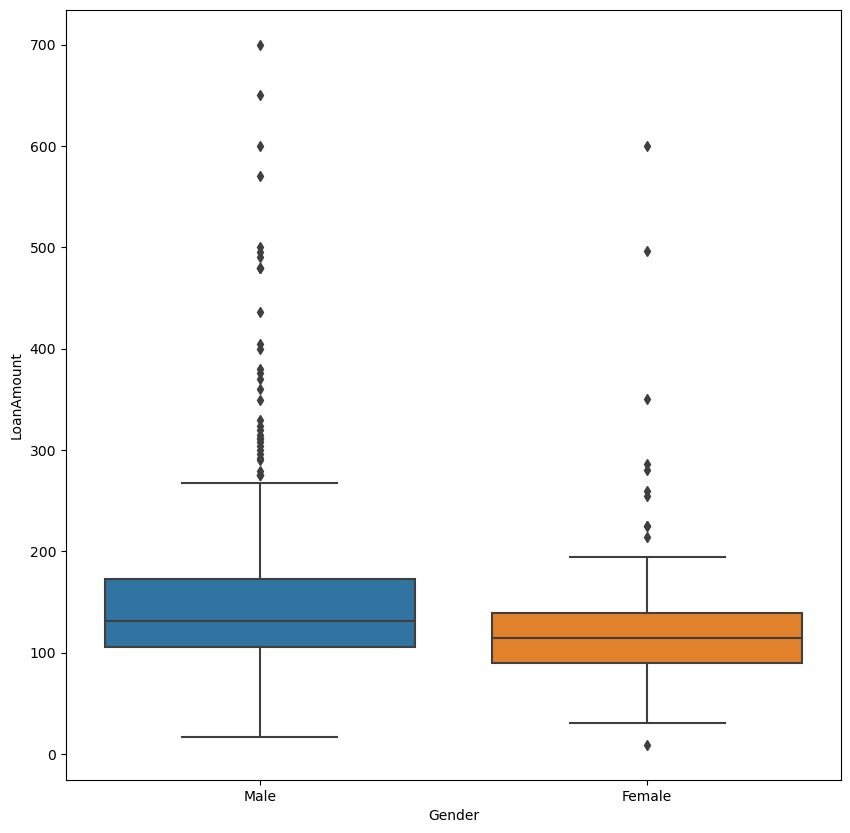

In [96]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,x='Gender',y='LoanAmount')

<AxesSubplot:xlabel='Self_Employed', ylabel='LoanAmount'>

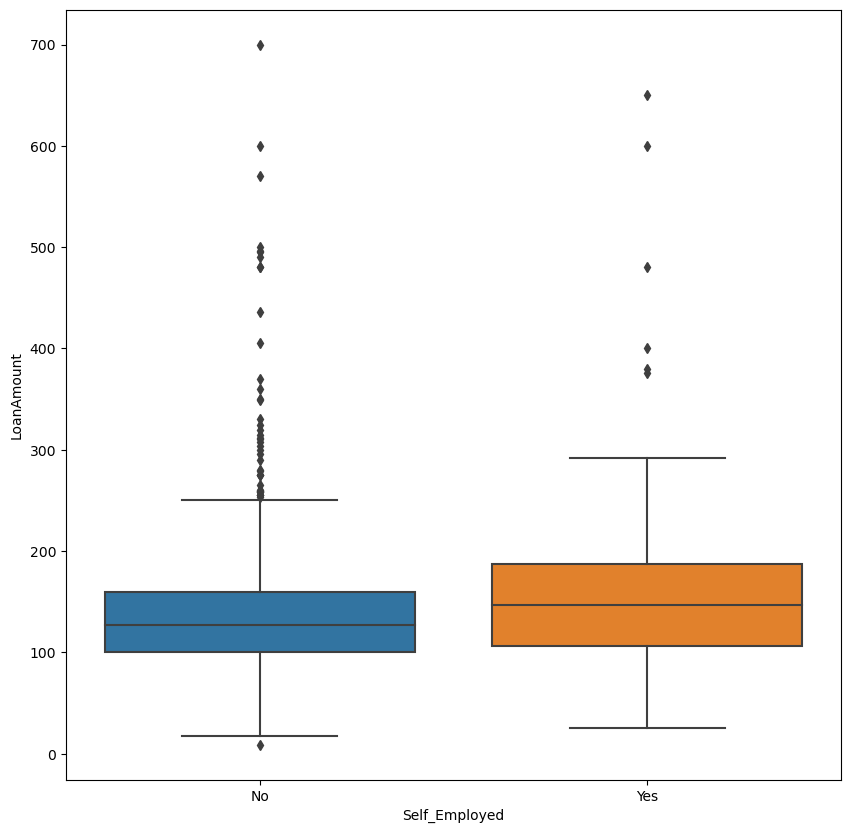

In [97]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,x='Self_Employed',y='LoanAmount')

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

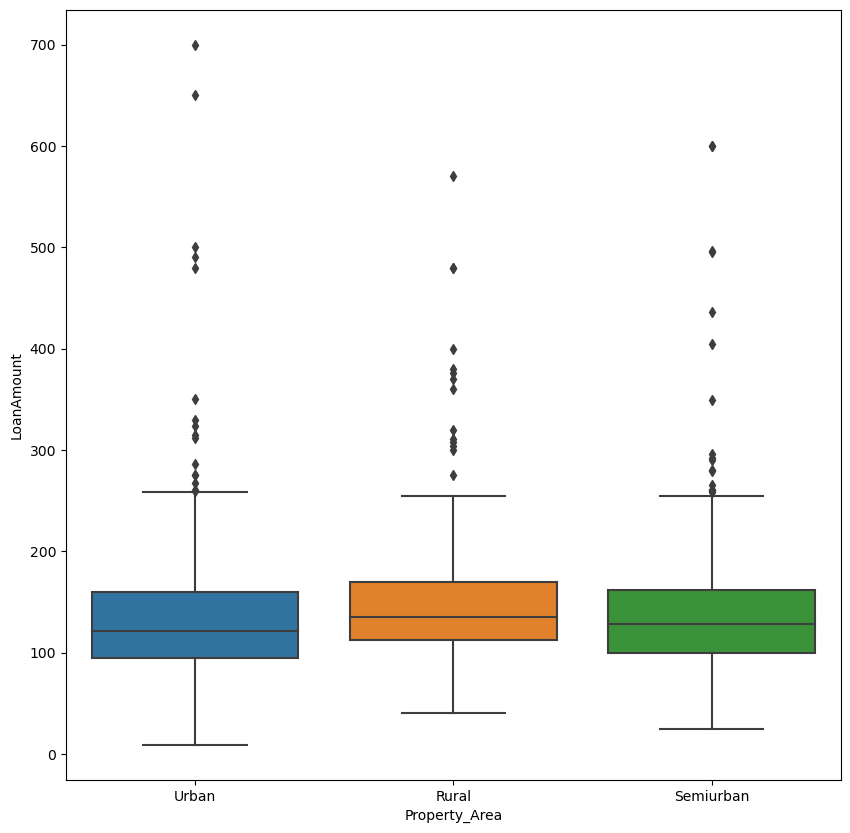

In [98]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,x='Property_Area',y='LoanAmount')

Text(0.5, 0, 'Loan Amount')

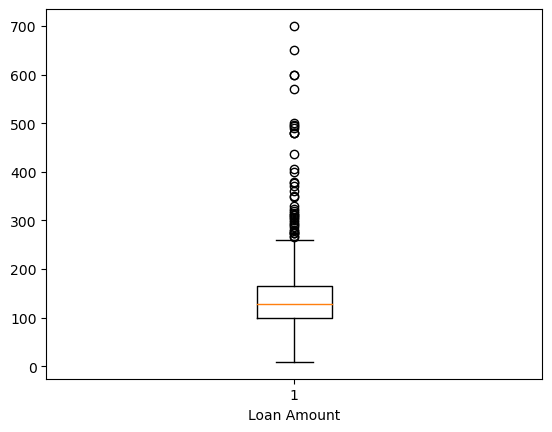

In [99]:
#Outliers Detection
plt.boxplot(df.LoanAmount)
plt.xlabel("Loan Amount")

Text(0.5, 0, 'Applicant Income')

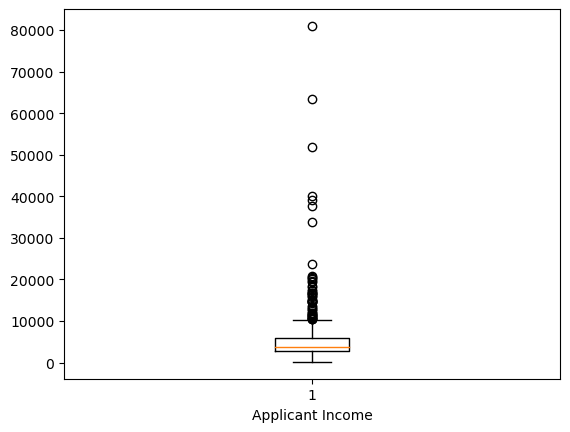

In [100]:
plt.boxplot(df.ApplicantIncome)
plt.xlabel('Applicant Income')

Text(0.5, 0, 'CoApplicant Label')

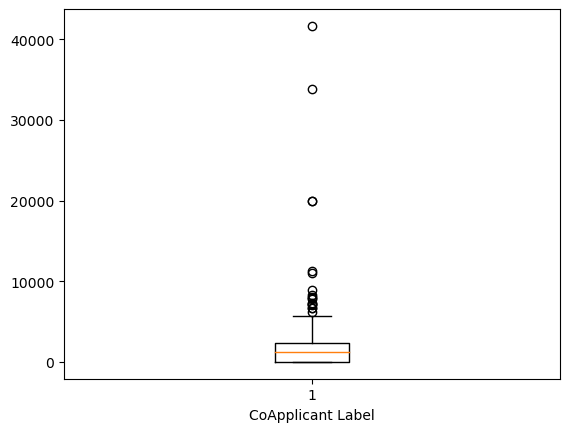

In [101]:
plt.boxplot(df.CoapplicantIncome)
plt.xlabel('CoApplicant Label')

Text(0.5, 0, 'Loan Amount Term')

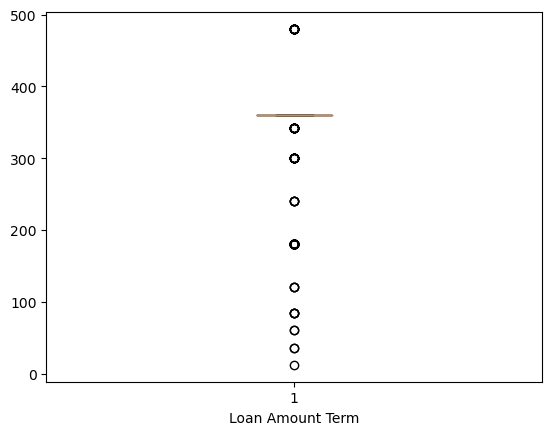

In [102]:
plt.boxplot(df.Loan_Amount_Term)
plt.xlabel('Loan Amount Term')